# Utilisation des mots ne figurant pas dans le dictionnaire français

## Paquets utilisés
On aura besoin des librairie externe: 
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [wordcloud](https://amueller.github.io/word_cloud/)

In [128]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw

from wordcloud import WordCloud
from typing import List

## Ouverture des fichiers contenant les données a utiliser

In [81]:
songs: pd.DataFrame
french: pd.Series
english: pd.Series

with open("./datas/songs.json", "r", encoding="utf8") as file:
        songs = pd.DataFrame(json.loads(file.read()))
        file.close()

with open("./datas/french.txt", "r", encoding="utf8") as file:
        french = pd.Series(file.read().lower().splitlines())
        file.close()

# Generated with http://app.aspell.net/create
with open("./datas/english.txt", "r", encoding="utf8") as file:
        english = pd.Series(file.read().lower().splitlines())
        file.close()

## Séléction et manipulation des données afin de pouvoir les utiliser

In [196]:
# Group all the words of all the songs in a single pd.Serie
words: pd.Series = songs["lyrics_keywords"].apply(lambda x: x.split(" ")).explode()

# Number of every differents words in all lyrics
all_words_count=len(words)

# Count all the words in this array
occurences: pd.Series = words.value_counts()

# Create a Dataframe that contains the number of occurence
# and if the word is inside the french dictionary
data = {
    "count": occurences,
    "is_french": occurences.index.isin(french),
    "is_english": occurences.index.isin(english)
}

description = pd.DataFrame(
    data=data,
    columns=["count", "is_french", "is_english"],
    index=occurences.index
)

#Select all the words and their count
words_count = pd.Series(description["count"], description.index)

# Select only the words that aren't french
not_french = description[description["is_french"] == False]
not_french = not_french[not_french["is_english"] == False]

frequency = pd.Series(not_french["count"], index=not_french.index)

with open("./datas/not_french.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

not_french

,count,is_french,is_english
yah,267,False,False
binks,266,False,False
biff,260,False,False
wesh,227,False,False
p'tit,205,False,False
...,...,...,...
cе-fran,1,False,False
oublira,1,False,False
spector,1,False,False
particolare,1,False,False


Ceci est la liste des mots de figurant pas dans le dictionnaire france avec leurs occurences (globale, parmis toutes les musiques)

## WordCloud, plus le mot est grand, plus il est utilisé

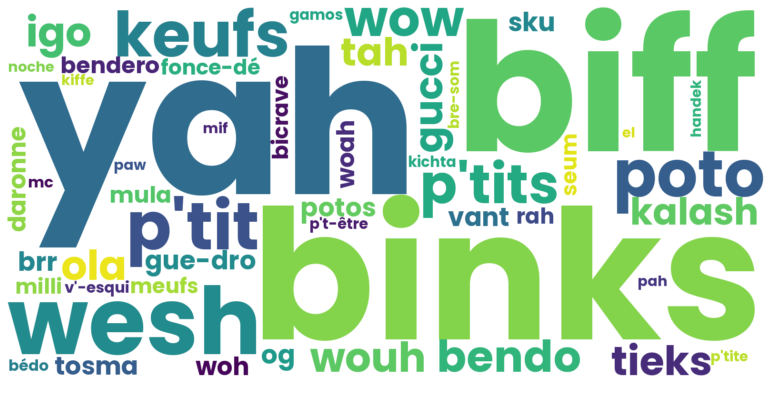

In [83]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme des mots

<AxesSubplot:>

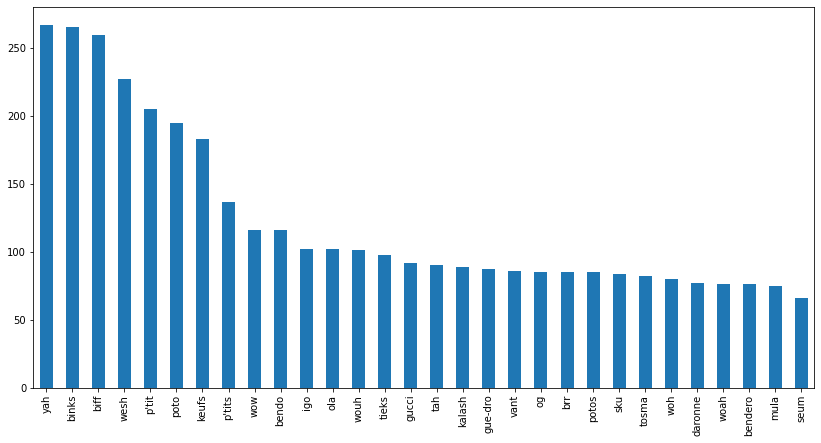

In [84]:
frequency[:30].plot(kind="bar", figsize=(14, 7))

## Recherche d'un mot particulier et pourcentage d'ut

In [217]:
#Textbox creation
word_textbox = ipw.Text(value='', placeholder='Search word', description='word:', disabled=False)

#Function called when the button is clicked
def textbox_changed(word):
    word_searched=str(word).lower()
    if word_searched in words_count:
        #number of times used
        print("The word \""+ word_searched + "\" is used " + str(words_count[word_searched])+ " times in all the lyrics\n")
        #percentage of use
        percentage_used_word = round(words_count[word_searched] / all_words_count * 100, 2)
        print("Percentage of use : " + str(percentage_used_word) + "%")
    else:
        print("The word \"" + word_searched + "\" is not in any lyrics")

#Button interaction
ipw.interact_manual(textbox_changed, word=word_textbox.value)

interactive(children=(Text(value='', description='word'), Button(description='Run Interact', style=ButtonStyle…

<function __main__.textbox_changed(word)>

# Les anglicismes

In [86]:
english_words = description[description["is_french"] == False]
english_words = english_words[english_words["is_english"] == True]

frequency = pd.Series(english_words["count"], index=english_words.index)

with open("./datas/english_words.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

english_words

,count,is_french,is_english
yeah,1303,False,True
hey,911,False,True
fuck,419,False,True
bitch,236,False,True
the,165,False,True
...,...,...,...
chronic,1,False,True
metier,1,False,True
what's,1,False,True
death,1,False,True


## WordCloud, plus le mot est grand, plus il est utilisé

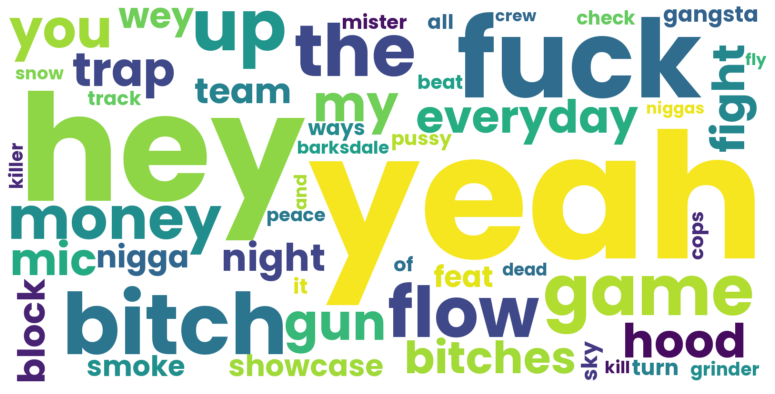

In [87]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme des mots

<AxesSubplot:>

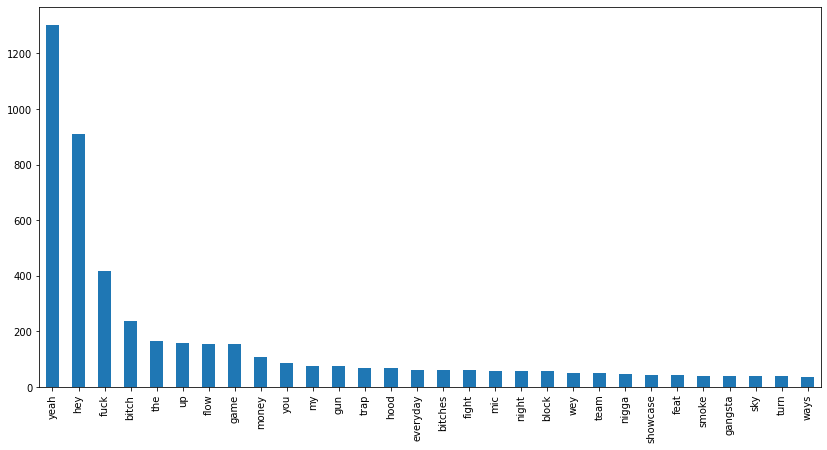

In [88]:
frequency[:30].plot(kind="bar", figsize=(14, 7))